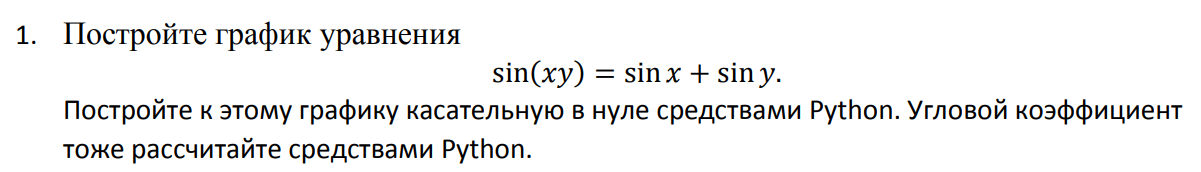

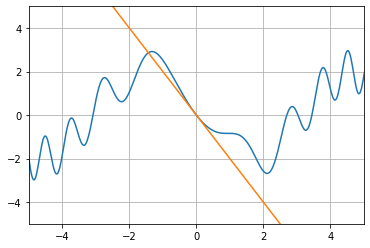

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
f = lambda x,y: np.sin(x*y)-np.sin(x)-np.sin(y)
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
Y = f(x,y)
plt.plot(x,Y)
x,y = sp.symbols('x y')
f = sp.sin(x*y)-sp.sin(x)-sp.sin(y)
f_dy = sp.diff(f,y,1)
f_dx = sp.diff(f,x,1)
f_dy = f_dy.subs(x,0).subs(y,0)
f_dx = f_dx.subs(x,0).subs(y,0)
tangent = lambda x,y: f_dx*x+f_dy*y
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
Y = tangent(x,y)
plt.plot(x,Y)
plt.axis([-5,5,-5,5])
plt.grid()
plt.show()

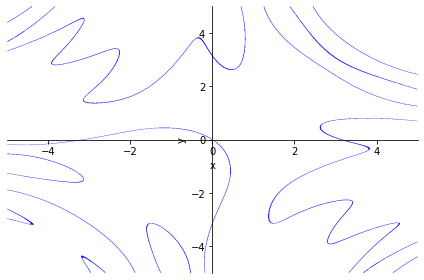

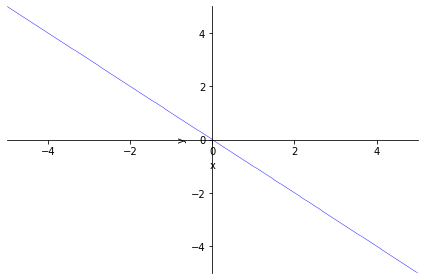

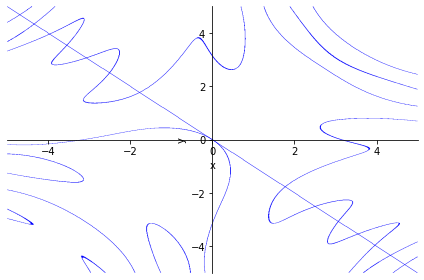

In [3]:
x,y = sp.symbols('x y')
plot1 = sp.plot_implicit(sp.sin(x*y)-sp.sin(x)-sp.sin(y))
plot2 = sp.plot_implicit(f_dx*x+f_dy*y)
plot1.append(plot2[0])
plot1.show()

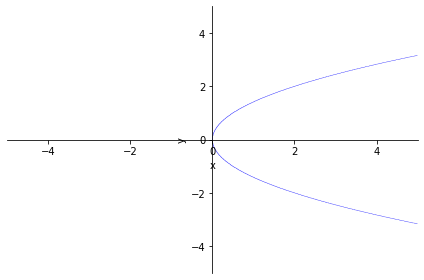

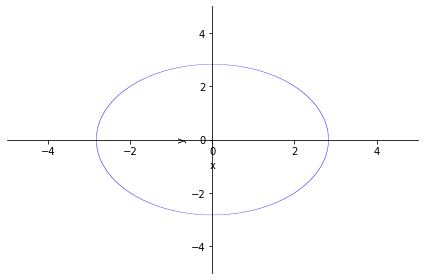

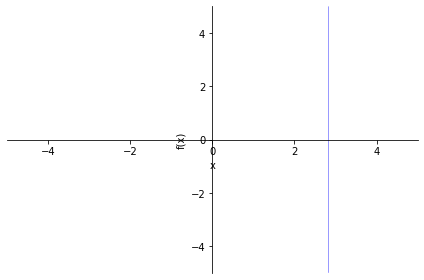

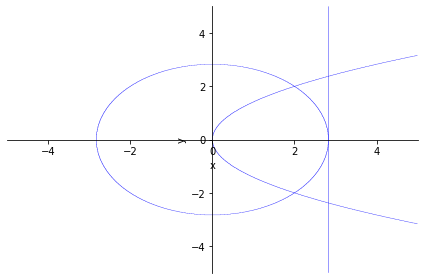

In [7]:
x,y = sp.symbols('x y')
plot1 = sp.plot_implicit(y**2-2*x)
plot2 = sp.plot_implicit(x**2+y**2-8)
plot3 = sp.plot_implicit(x-sp.sqrt(8))
plot1.append(plot2[0])
plot1.append(plot3[0])
plot1.show()

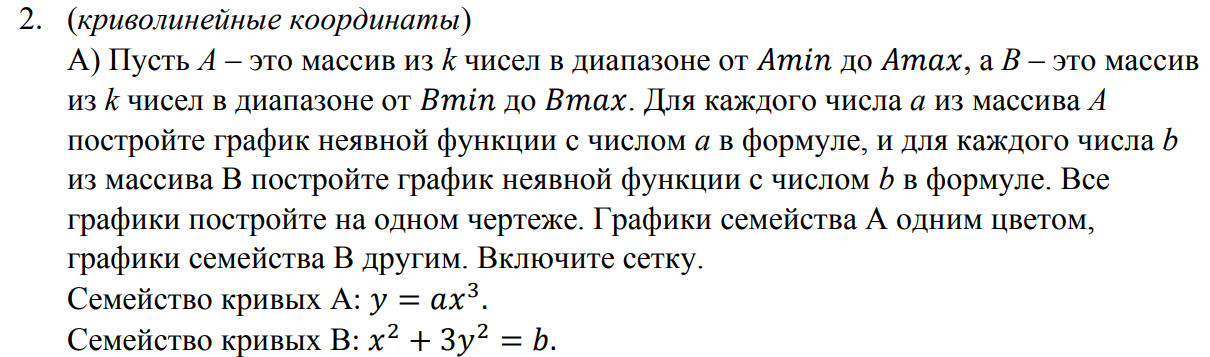

(-1.0, 1.0, -2.0, 4.0)

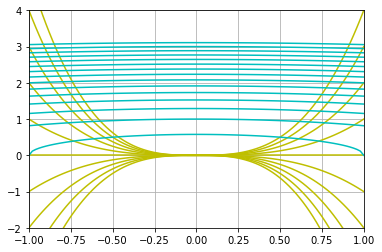

In [4]:
A = range(-5,5)
B = range(1,30,2)
x = np.linspace(-1,1,100)
for a in A:
    y = a*x**3
    plt.plot(x,y,'y')

for b in B:
    y = np.sqrt((b-x**2)/3)
    plt.plot(x,y,'c')
plt.grid()
plt.axis([-1,1,-2,4])

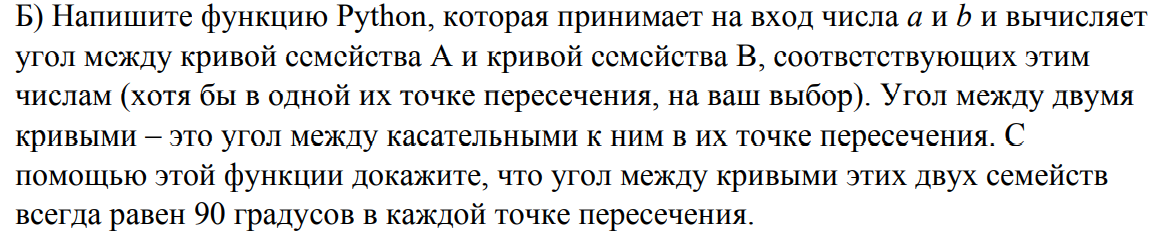

In [5]:
def angle(a,b):
    x = sp.symbols('x')
    ya = a*x**3
    yb = sp.sqrt((b-x**2)/3)
    x0 = sp.solve(ya-yb,x)
    x0 = sp.N(x0[0],10)
    y0 = sp.N(ya.subs(x,x0),10)
    
    ya_dx = sp.diff(ya,x,1)
    ya_dx = sp.N(ya_dx.subs(x,x0),10)
    
    yb_dx = sp.diff(yb,x,1)
    yb_dx = sp.N(yb_dx.subs(x,x0),10)
    
    tg = sp.N((yb_dx-ya_dx)/(1+yb_dx*ya_dx),10)
    fi = sp.atan(tg)                                        #считаем угол
    fi = fi*180/np.pi
    print(fi)
    #____________________________________________________________________________________________________________
    
    ya0 = sp.N(ya.subs(x,x0),10)
    yb0 = sp.N(yb.subs(x,x0),10)
    x = np.linspace(-np.sqrt(b)+0.1,np.sqrt(b)-0.1,100)
    ya = a*x**3
    yb = np.sqrt((b-x**2)/3)
    plt.plot(x,ya,'c')                                          #рисуем графики
    plt.plot(x,yb,'y')                                             
    concerna = ya0+ya_dx*(x-x0)
    concernb = yb0+yb_dx*(x-x0)
    plt.plot(x,concerna)
    plt.plot(x,concernb)
    plt.plot(x0,y0,'or')
    plt.axis([float(x0)-100,float(x0)+100,float(y0)-100,float(y0)+100])
    plt.show()
    

    

AccumBounds(-28.6478897565412*pi, 28.6478897565412*pi)


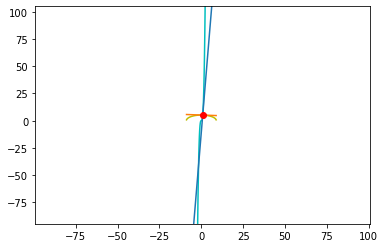

AccumBounds(-28.6478897565412*pi, 28.6478897565412*pi)


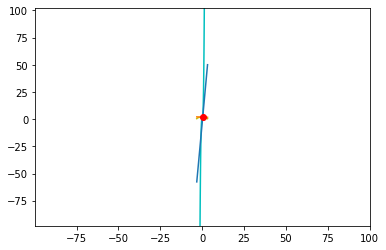

-90.0000000000755


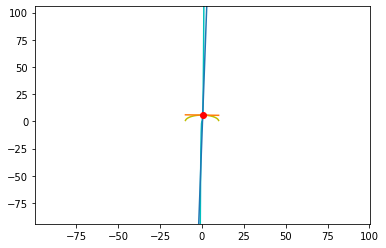

AccumBounds(-28.6478897565412*pi, 28.6478897565412*pi)


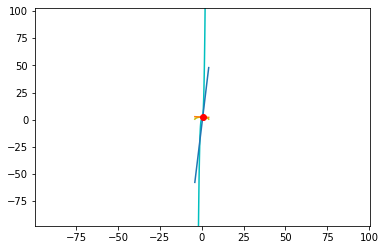

-90.0000000000755


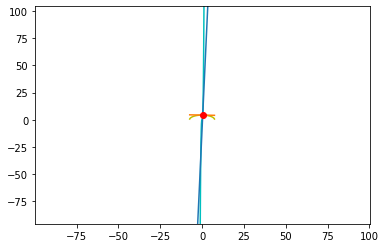

90.0000000000755


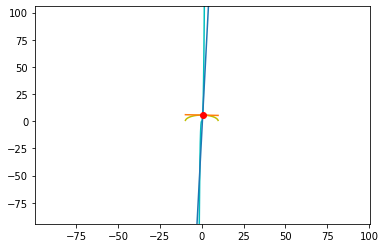

In [8]:
from random import randint
a = [randint(1,100) for i in range(6)]
b = [randint(1,100) for i in range(6)]
for a,b in zip(a,b):
    angle(a,b)

In [ ]:
def tangent_line(expression,x0):
    x = sp.symbols('x')
    f = expression
    f_dx = sp.diff(f,x,1)
    f0 = f.subs(x,x0)
    f_dx = f_dx.subs(x,x0)
    x = np.linspace(-np.sqrt(b)**3+0.1,np.sqrt(b)**3-0.1,100)
    concern = f0+f_dx*(x-x0)
    plt.plot(x,concern)
    N = np.array([x[10],concern[10]])
    return N

In [ ]:
def angle(a,b):
    x = np.linspace(-np.sqrt(b)+0.1,np.sqrt(b)-0.1,1000000)
    ya = a*x**3
    yb = np.sqrt((b-x**2)/3)
    
    plt.plot(x,ya,'c')
    plt.plot(x,yb,'y')

    intersection = np.round(ya,2)==np.round(yb,2)
    Y = ya[intersection] 
    X = x[intersection] 
    O = np.array([X[0],Y[0]])
    plt.plot(X[0],Y[0],'or')

    x = sp.symbols('x')
    A = tangent_line(a*x**3,X[0])

    B = tangent_line(sp.sqrt((b-x**2)/3),X[0])

    OB = B-O
    OA = A-O
    cos = (OA[0]*OB[0]+OA[1]*OB[1])/(sp.sqrt(OA[0]**2+OA[1]**2)*sp.sqrt(OB[0]**2+OB[1]**2))
    fi = sp.acos(cos)
    print(fi*180/np.pi)
    plt.axis([-np.sqrt(b),np.sqrt(b),-np.sqrt(b),np.sqrt(b)])
    plt.show()

In [ ]:
a = [randint(1,1000) for i in range(6)]
b = [randint(1,1000) for i in range(6)]
for a,b in zip(a,b):
    angle(a,b)

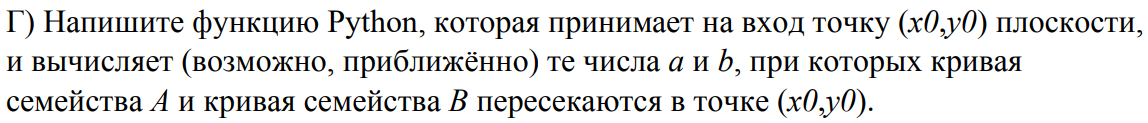

In [18]:
def coeffs(x0,y0):
    a = lambda x,y: y/x**3
    b = lambda x,y: x**2+3*y**2
    a = a(x0,y0)
    b = b(x0,y0)
    x = np.linspace(-np.sqrt(b)+0.1,np.sqrt(b)-0.1,1000)
    ya = a*x**3
    yb = np.sqrt((b-x**2)/3)
    plt.plot(x,ya,'c')
    plt.plot(x,yb,'y')
    plt.plot(x0,y0,'or')
    print(f'a = {a}')
    print(f'b = {b}')
    plt.show()

a = 0.037037037037037035
b = 12


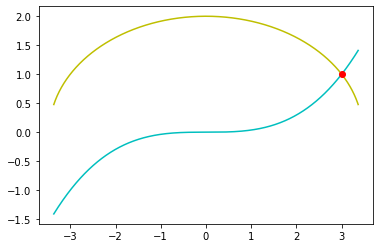

In [19]:
coeffs(3,1)

a = 0.001548568244170096
b = 1007436


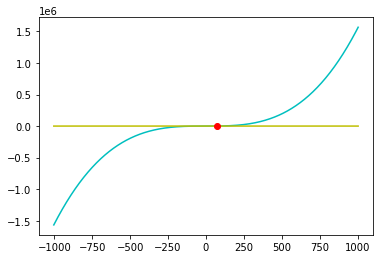

a = 1.730428824043634e-07
b = 348244


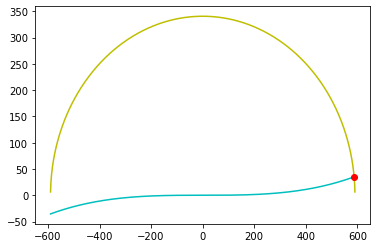

a = 1.003948020774286e-05
b = 953452


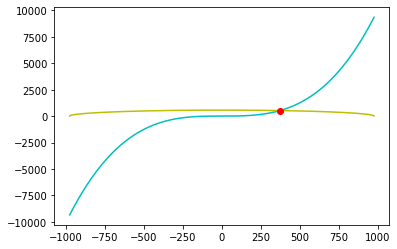

a = 2.91961712760501e-06
b = 2806572


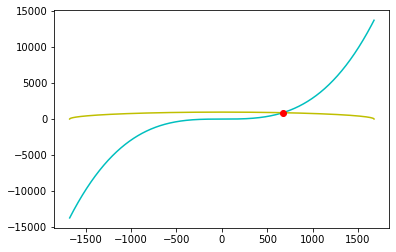

a = 4.767048265059267e-05
b = 1145116


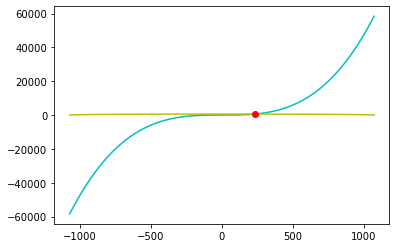

a = 1.8634284946708135e-06
b = 2227647


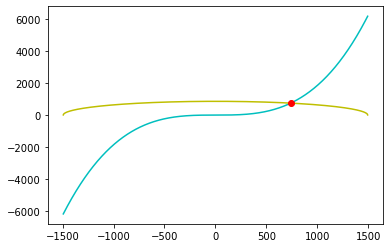

In [20]:
x0 = [randint(1,1000) for i in range(6)]
y0 = [randint(1,1000) for i in range(6)]
for x0,y0 in zip(x0,y0):
    coeffs(x0,y0)

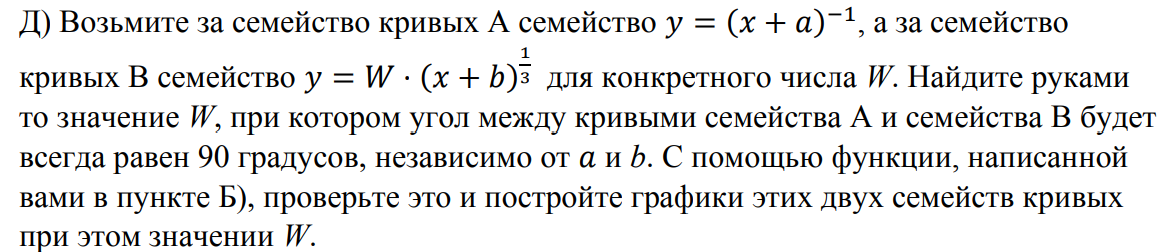


In [27]:
x,a,b,w,x0 = sp.symbols('x a b w x0')
ya = (x+a)**-1
yb = w*(x+b)**(1/3)
ya0 = ya.subs(x,x0)
yb0 = yb.subs(x,x0)
ya_dx = sp.diff(ya,x,1)
yb_dx = sp.diff(yb,x,1)
ya0_dx = ya_dx.subs(x,x0)
yb0_dx = yb_dx.subs(x,x0)
one = sp.solve((1+ya0_dx*yb0_dx),a)
two = sp.solve(ya0-yb0,a)

In [28]:
sp.solve(one[0]-two[0],w)[0]

1.44224957030741

In [48]:
def angle(a,b):
    x = sp.symbols('x')
    ya = 1/(x+a)
    w = 1.44224957030741 
    yb = w*(x+b)**(1/3)
    x0 = sp.solve(ya-yb,x)     #точка пересечения графиков по OX
    x0 = x0[0]
    y0 = ya.subs(x,x0)         #по OY
    
    ya_dx = sp.diff(ya,x,1)
    ya_dx = ya_dx.subs(x,x0)
    
    yb_dx = sp.diff(yb,x,1)
    yb_dx = yb_dx.subs(x,x0)

    tg = (yb_dx-ya_dx)/(1+yb_dx*ya_dx)
    fi = sp.atan(tg)                                        #считаем угол
    fi = fi*180/np.pi
    print(fi)
    #___________________________________________________________________________________________
    ya0 = ya.subs(x,x0)
    yb0 = yb.subs(x,x0)
    xa = np.linspace(-a+0.1,a,100)
    xb = np.linspace(-b,b,100)
    ya = 1/(xa+a)
    w = 1.44224957030741 
    yb = w*(xb+b)**(1/3)
    plt.plot(xa,ya,'c')                                          #рисуем графики
    plt.plot(xb,yb,'y')                                             
    concerna = ya0+ya_dx*(xa-x0)
    concernb = yb0+yb_dx*(xb-x0)
    plt.plot(xa,concerna)
    plt.plot(xb,concernb)
    plt.plot(x0,y0,'or')
    plt.axis([float(x0)-10,float(x0)+10,float(y0)-10,float(y0)+10])
    plt.show()

-89.9999999998187


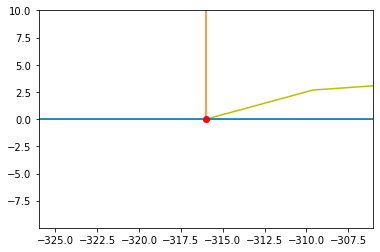

89.9999999999999


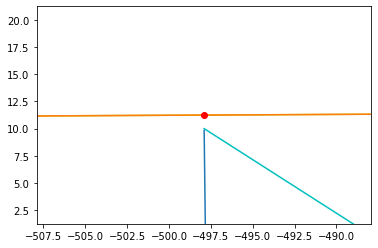

-89.9999999999413


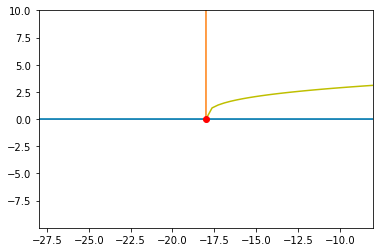

-89.9999999999995


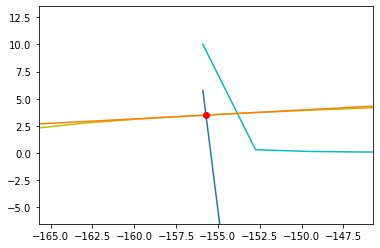

89.9999999998804


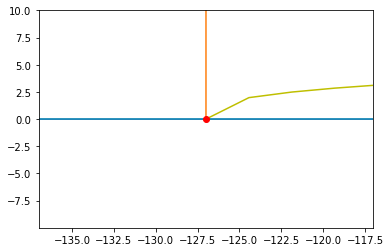

-89.9999999993576


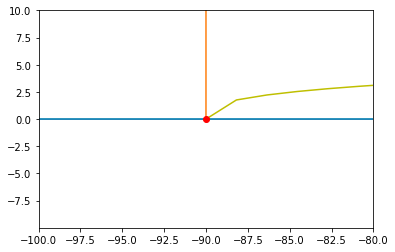

In [49]:
a = [randint(1,1000) for i in range(6)]
b = [randint(1,1000) for i in range(6)]
for a,b in zip(a,b):
    angle(a,b)

-89.9999999999999


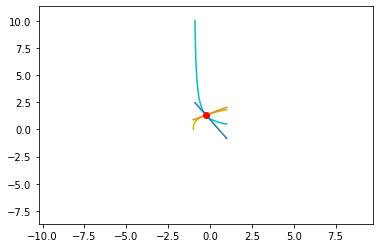

In [50]:
angle(1,1)

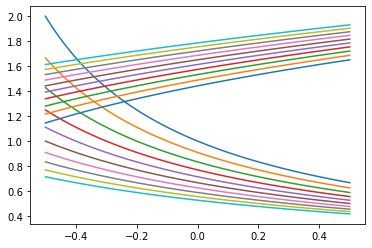

In [40]:
xa = np.linspace(-0.5,0.5,100)
for a in np.arange(1,2,0.1):
    ya = 1/(xa+a)
    plt.plot(xa,ya)
    
xb = np.linspace(-0.5,0.5,100)
for b in np.arange(1,2,0.1):
    yb = 1.44224957030741*(xb+b)**(1/3)
    plt.plot(xb,yb)


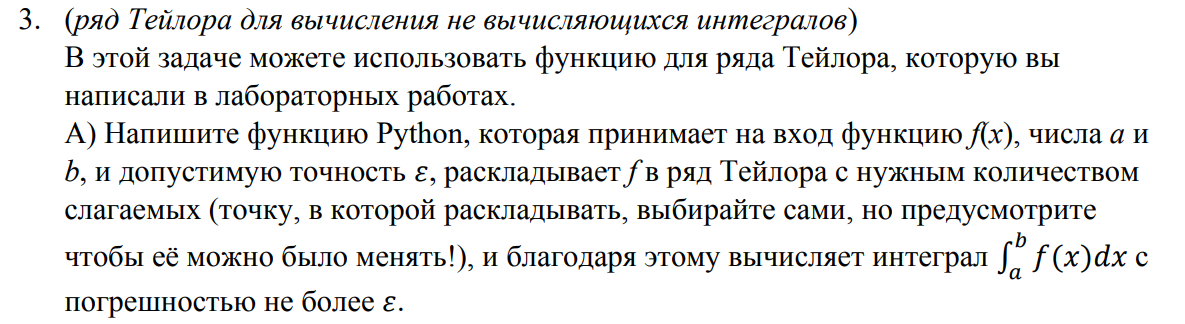

In [9]:
def integrate(f,a,b,e,x0):
    x = sp.symbols('x')
    equation = f
    numbers = []
    dx = True
    i = 0
    while abs(dx)>e:
        print(i)
        dx = sp.diff(equation,x,i)
        dx = dx.subs(x,x0)
        dx = dx*(x-x0)**i/sp.factorial(i)
        dx = sp.integrate(dx,x)
        dx = dx.subs(x,a)-dx.subs(x,b)
        numbers.append(dx)
        i += 1
    del numbers[-1]    
    print(sp.N(sum(numbers),10))

In [10]:
x = sp.symbols('x')
integrate(sp.sin(x)/x,sp.pi,0,0.01,1)

0
1
2
3
4
5
6
1.854496176


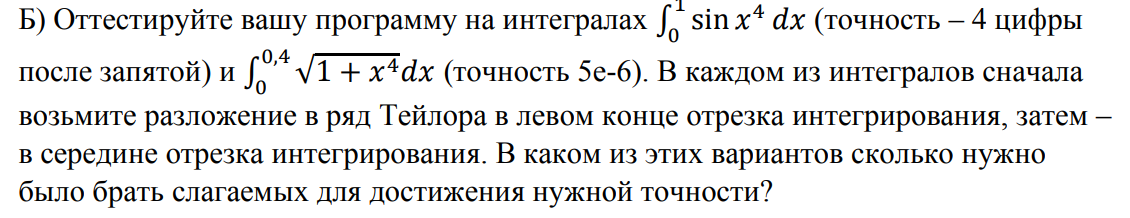

In [86]:
integrate(sp.sin(x**4),1,0,0.01,0.6)

0
1
2
3
4
0.1861348649


In [87]:
integrate(sp.sqrt(1+x**4),0.4,0,0.000005,0.36)

0
1
2
3
4
5
6
7
0.4010148950


In [88]:
integrate(sp.sqrt(1+x**4),0.4,0,0.000005,0.1)


0
1
2
3
4
5
0.4010233960


In [1]:
import functions as fc

In [2]:
fc.divided_difference([1,2,3,4,5,6],1,2,lambda x: x**2)

3.0  - разделенная разность первого порядка
